<a href="https://colab.research.google.com/github/Nkashyap-anand/human-posture-estimation/blob/main/32_TF_CNN_human_posture_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import numpy as np
from time import sleep as s
import cv2
import os
import pandas as pd
import random as rm

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory( "/content/drive/MyDrive/posture/training",
                                          target_size= (512,512),
                                          batch_size= 4,
                                          class_mode="categorical")
validation_dataset = train.flow_from_directory( "/content/drive/MyDrive/posture/validation",
                                          target_size= (512,512),
                                          batch_size= 4,
                                          class_mode="categorical")
test_dataset = train.flow_from_directory("/content/drive/MyDrive/posture/testing",
                                    target_size= (512,512),
                                    batch_size= 4,
                                    class_mode="categorical")

Found 2880 images belonging to 4 classes.
Found 960 images belonging to 4 classes.
Found 960 images belonging to 4 classes.


In [ ]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32,(3,3),activation ="relu", input_shape =(512,512,3)),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(32,(3,3),activation ="relu"),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(32,(3,3),activation ="relu"),
tf.keras.layers.MaxPool2D(2,2),
# tf.keras.layers.Conv2D(128,(3,3),activation ="relu"),
# tf.keras.layers.MaxPool2D(2,2),
# tf.keras.layers.Conv2D(256,(3,3),activation ="relu"),
# tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(32, activation = "relu"),
tf.keras.layers.Dense(4,activation ="softmax")])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 32)       0

In [ ]:
model.compile(loss="categorical_crossentropy" , optimizer="adam" ,metrics =["accuracy"])

In [ ]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch= 32,
                     epochs= 50,
                     validation_data= validation_dataset)

Epoch 1/50
32/32 [==============================] - 320s 10s/step - loss: 1.5667 - accuracy: 0.3594 - val_loss: 1.0187 - val_accuracy: 0.5031
Epoch 2/50
32/32 [==============================] - 32s 1s/step - loss: 1.0378 - accuracy: 0.6406 - val_loss: 0.8369 - val_accuracy: 0.6750
Epoch 3/50
32/32 [==============================] - 31s 958ms/step - loss: 0.7208 - accuracy: 0.7109 - val_loss: 0.8830 - val_accuracy: 0.6438
Epoch 4/50
32/32 [==============================] - 29s 915ms/step - loss: 0.8955 - accuracy: 0.6641 - val_loss: 0.8023 - val_accuracy: 0.7125
Epoch 5/50
32/32 [==============================] - 30s 935ms/step - loss: 0.5887 - accuracy: 0.7969 - val_loss: 0.7743 - val_accuracy: 0.7292
Epoch 6/50
32/32 [==============================] - 28s 880ms/step - loss: 0.5344 - accuracy: 0.8125 - val_loss: 0.6875 - val_accuracy: 0.7490
Epoch 7/50
32/32 [==============================] - 27s 832ms/step - loss: 0.7153 - accuracy: 0.7500 - val_loss: 0.6812 - val_accuracy: 0.7615
Epo

In [ ]:
test_predictions = model.predict(test_dataset)
test_predictions

array([[9.6572447e-01, 5.2763103e-03, 2.8951785e-02, 4.7435464e-05],
       [8.9124101e-01, 2.9156259e-03, 9.8368458e-02, 7.4748434e-03],
       [2.0068199e-05, 9.9992430e-01, 5.4593278e-05, 1.1315205e-06],
       ...,
       [2.6258791e-04, 1.2671999e-03, 2.4392440e-03, 9.9603099e-01],
       [1.2515086e-01, 1.1390621e-01, 7.5970906e-01, 1.2338823e-03],
       [9.7476429e-01, 1.3464291e-03, 2.5498569e-03, 2.1339487e-02]],
      dtype=float32)

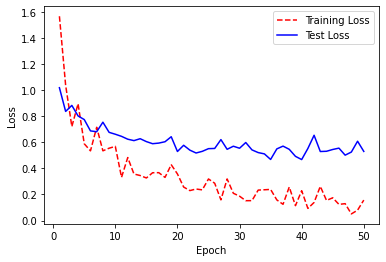

In [ ]:
import matplotlib.pyplot as plt
# Get training and test loss histories
training_loss = model_fit.history['loss']
test_loss = model_fit.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

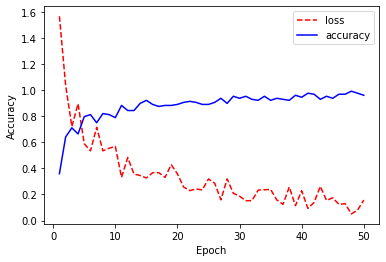

In [ ]:
loss = model_fit.history['loss']
accuracy = model_fit.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(accuracy) + 1)

# Visualize loss history
plt.plot(epoch_count, loss, 'r--')
plt.plot(epoch_count, accuracy, 'b-')
plt.legend(['loss', 'accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();